In [17]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

img_height, img_width = 28, 28
batch_size = 32

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.15)

train_generator = datagen.flow_from_directory(
    'dataset/',
    target_size=(img_height, img_width),
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = datagen.flow_from_directory(
    'dataset/',
    target_size=(img_height, img_width),
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

num_classes = len(train_generator.class_indices)
print(f"Number of classes (letters): {num_classes}")

Found 8389 images belonging to 63 classes.
Found 1444 images belonging to 63 classes.
Number of classes (letters): 63


In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input

model = Sequential([
    Input(shape=(28,28,1)),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.2),
    Dense(num_classes, activation='softmax'),
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 63)             │        32,319 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 191,039 (746.25 KB)

 Trainable params: 191,039 (746.25 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)

Epoch 1/10


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


263/263 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.0868 - loss: 3.6135 - val_accuracy: 0.4259 - val_loss: 1.5842
Epoch 2/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.4361 - loss: 1.5194 - val_accuracy: 0.5319 - val_loss: 1.1646
Epoch 3/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.5483 - loss: 1.1442 - val_accuracy: 0.5838 - val_loss: 1.0222
Epoch 4/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.6139 - loss: 0.9497 - val_accuracy: 0.6080 - val_loss: 0.9126
Epoch 5/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.6589 - loss: 0.8332 - val_accuracy: 0.6205 - val_loss: 0.9320
Epoch 6/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.6778 - loss: 0.7770 - val_accuracy: 0.6434 - val_loss: 0.8566
Epoch 7/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.7078 - loss: 0.6903 - val_accuracy: 0.6309 - val_loss: 0.8960
Epoch 8/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.7276 - loss: 0.6602 - val_accuracy: 0.652

In [20]:
model.save('letter_recognizer_model.keras')

In [27]:
from tensorflow.keras.preprocessing import image

img_path = 'test letter.png'
img = image.load_img(img_path, target_size=(img_height, img_width), color_mode='grayscale')
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.

prediction = model.predict(img_array)
predicted_class_index = np.argmax(prediction)
labels = list(train_generator.class_indices.keys())
predicted_letter = labels[predicted_class_index]

print(f"Predicted Letter: {predicted_letter}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Predicted Letter: we_wi


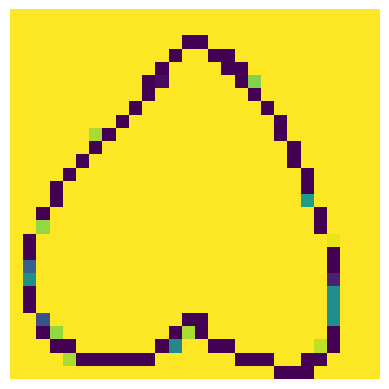

In [28]:
plt.imshow(img)
plt.axis('off')
plt.show()

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


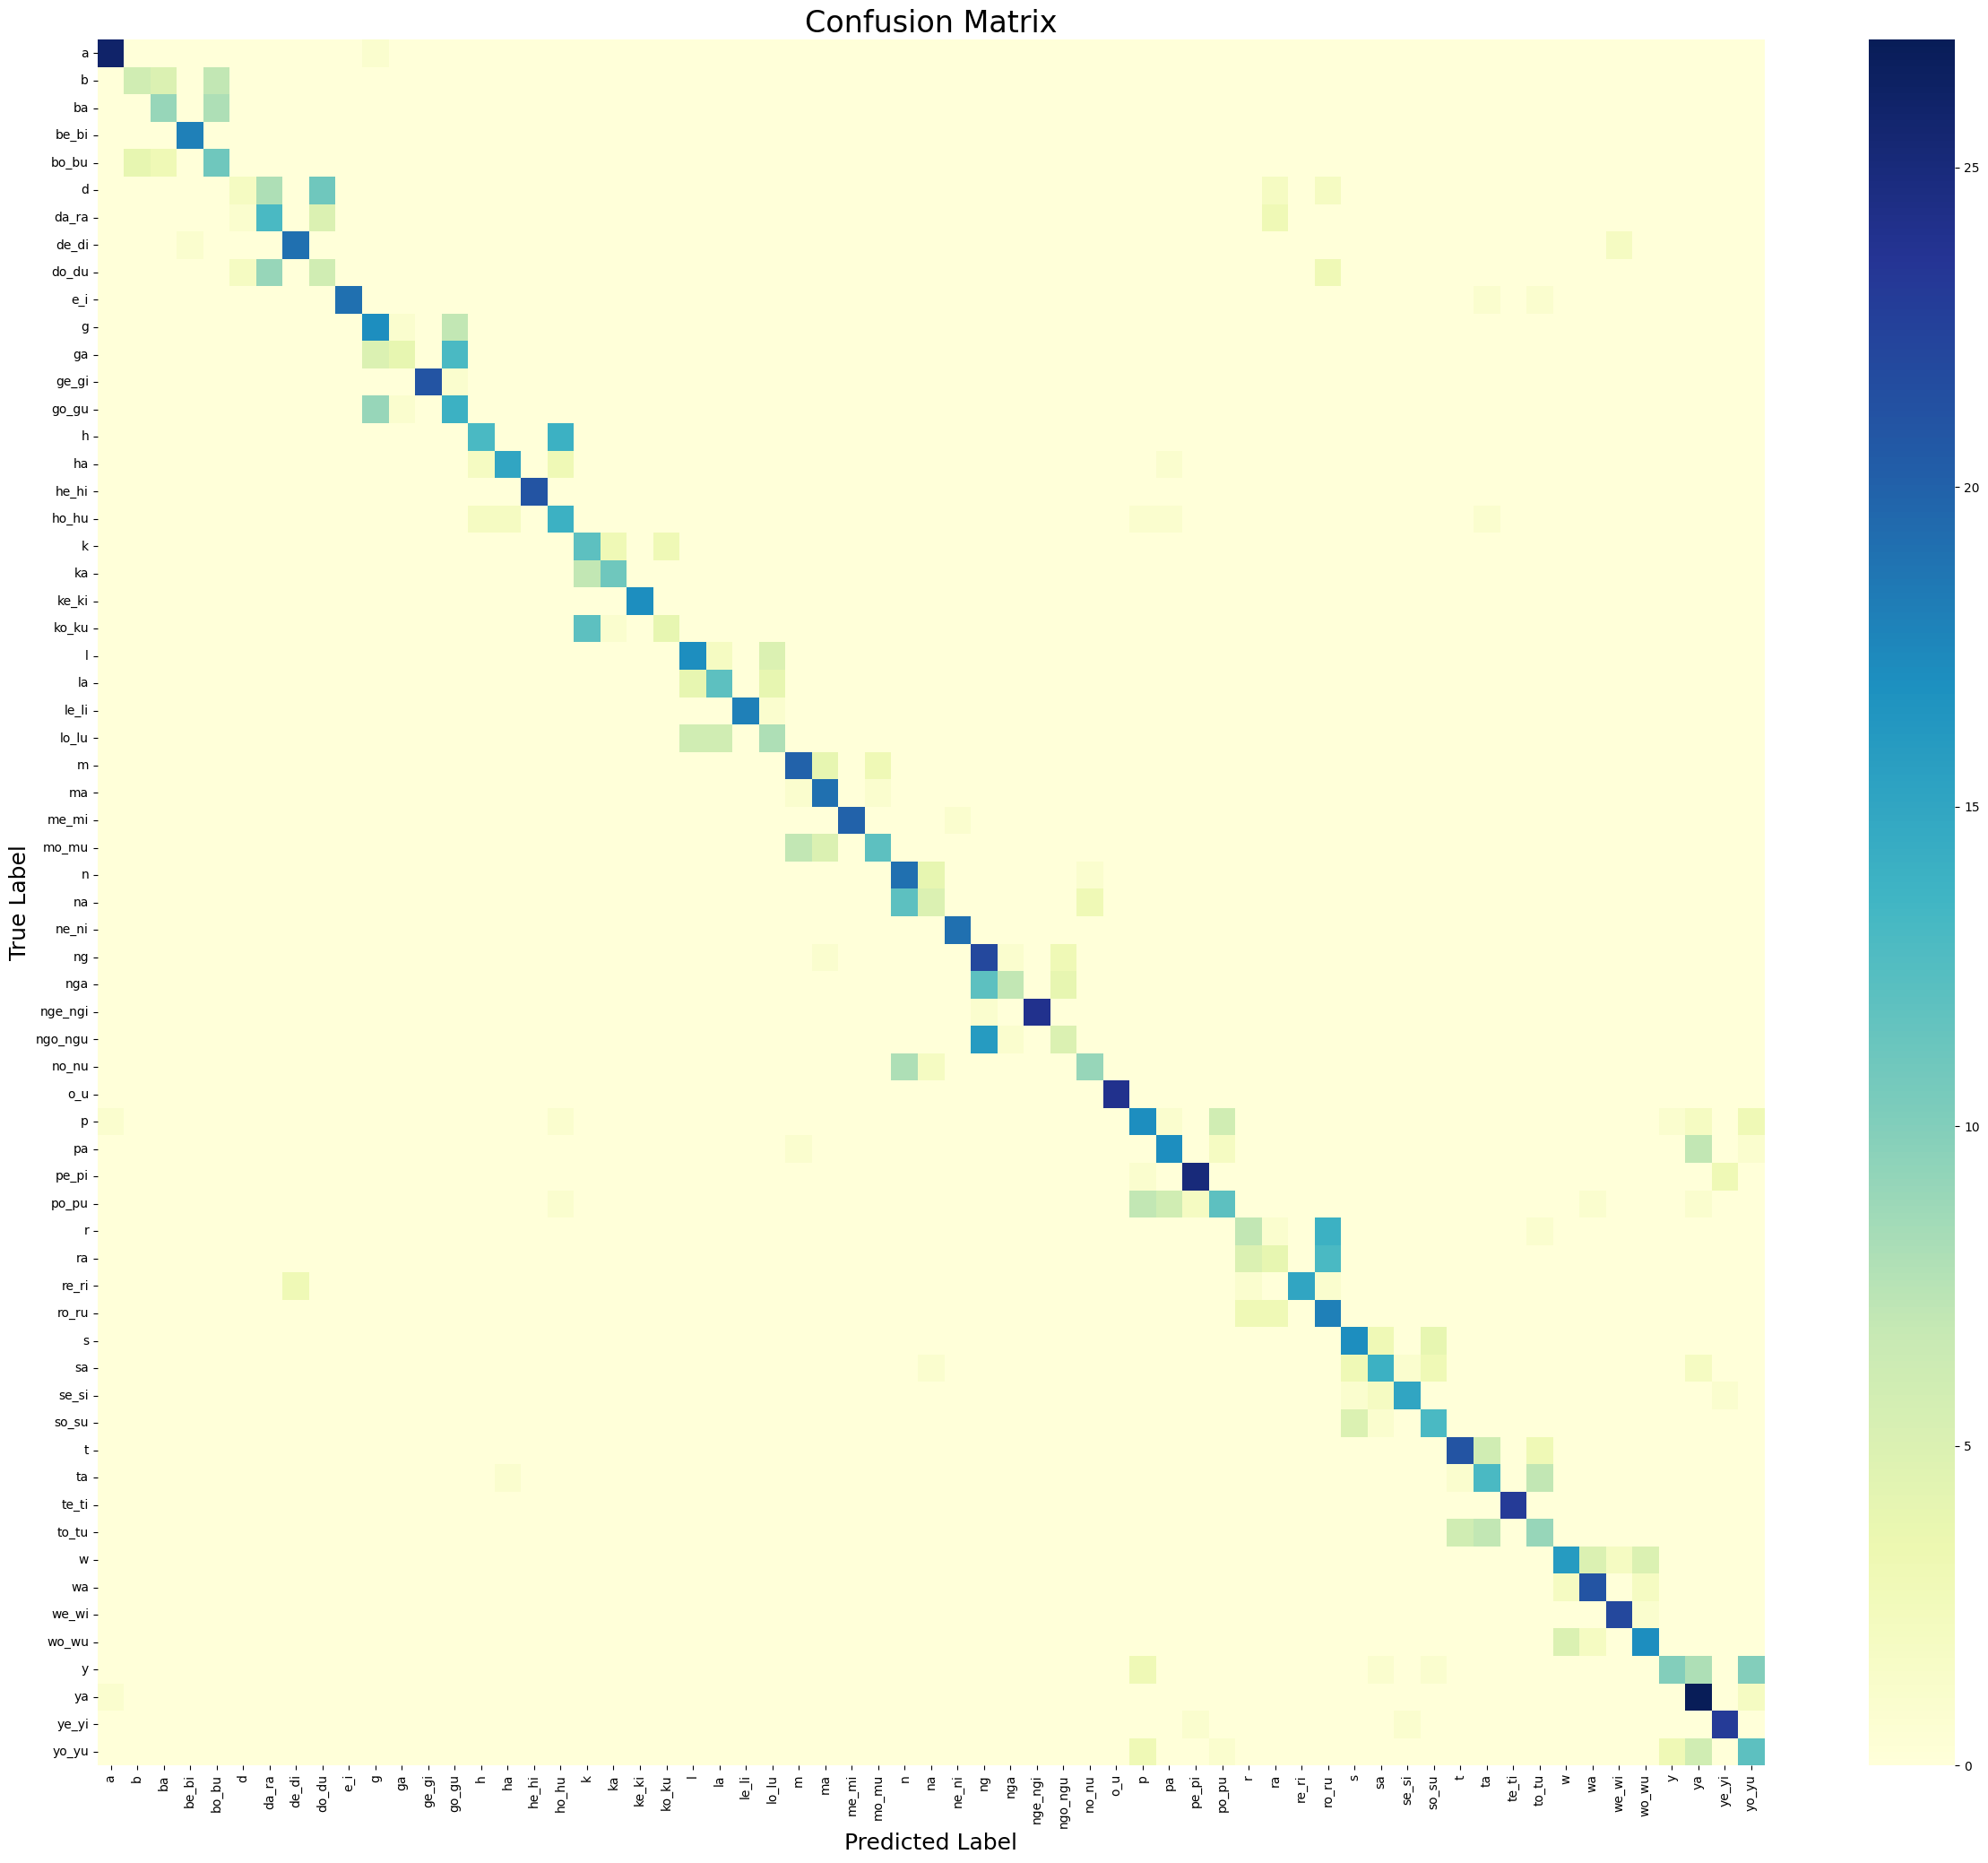

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming you have y_true, y_pred, and labels
y_pred_probs = model.predict(val_generator)
y_pred = np.argmax(y_pred_probs, axis=1)

# Get true labels
y_true = val_generator.classes

labels = list(train_generator.class_indices.keys())
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(30, 25))  # 🔥 increase this size to make it cleaner (30x25 for example)
sns.heatmap(cm, annot=False, fmt='d', cmap='YlGnBu',xticklabels=labels, yticklabels=labels)

plt.title("Confusion Matrix", fontsize=24)
plt.xlabel("Predicted Label", fontsize=18)
plt.ylabel("True Label", fontsize=18)
plt.xticks(fontsize=10)
plt.xticks(rotation=90)
plt.yticks(fontsize=10)
plt.show()

In [24]:
print(len(y_true), len(y_pred))

1444 1444
